<a href="https://colab.research.google.com/github/louispaulet/Classfication_and_Representation_Learning_course/blob/main/Tutorial2_CLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

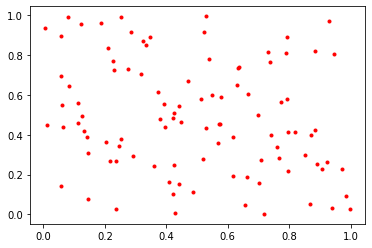

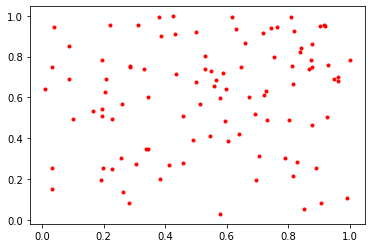

In [ ]:
from numpy import *
import matplotlib.pyplot as plt

#load the data set
dataCirc = loadtxt('circular_classification.data')
dataNL = loadtxt('nonlinear_classification.data')

def visualize(data):
  X = data[:, 0]
  Y = data[:, 1]
  plt.plot(X, Y, 'r.')
  plt.show()

visualize(dataCirc)
visualize(dataNL)

In [ ]:
# Separate the input from the output
X = dataNL [ : , : 2 ]
T = dataNL [ : , 2 ]
N , d = X.shape
# Parameters
eta = 0.05 # learning rate
K = 15 # Number of hidden neurons
# Weights and biases
max_val = 0.1
W_hid = random.uniform(-max_val, max_val, (d , K))
b_hid = random.uniform(-max_val, max_val, K)
W_out = random.uniform(-max_val, max_val, K)
b_out = random.uniform(-max_val, max_val, 1)

W_hid.shape,b_hid.shape,W_out.shape,b_out.shape

((2, 15), (15,), (15,), (1,))

In [ ]:
#Logistic transfer function for the hidden neurons
def logistic(x):
  return 1.0 / (1.0 + exp(-x))
#Threshold transfer function for the output neuron
def threshold(x):
  data = x.copy()
  data[data > 0.] = 1.
  data[data < 0.] = -1.
  return data
def feedforward(X,W_hid,b_hid,W_out,b_out):
  #Hidden layer
  Y = logistic(dot(X, W_hid)+b_hid)
  #Output layer
  O = threshold(dot(Y, W_out)+b_out)
  return Y,O

In [ ]:
def logistic_prime(o):
  return o * (1 - o)

In [ ]:
errors = []
#for epochs until timeout
for epoch in range(1):
  nb_errors = 0
  #for each sample
  for i in range(N):
    x=X[i,:] #true input
    t=T[i] #true ouput
    y,o=feedforward(x,W_hid,b_hid,W_out,b_out)
    if t != o: #if true output doesn't match predicted output
      nb_errors += 1
    delta_out = (t-o) #delta between predicted and true output
    delta_hidden = delta_out * logistic_prime(o) #WIP
    # print(delta_hidden)
    W_out += eta * delta_out * W_out + b_out #TODO
    b_out += eta * delta_out * b_out  #- b_hid * eta #TODO
    
    for k in range(K):
      W_hid[:,k] += dot(x, W_out) * eta + b_hid #TODO
    b_hid += - delta_hidden * eta * b_hid #TODO
  if nb_errors == 0:
    print('success')
    break
  
nb_errors

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


47

In [ ]:
y, o
# sum(W_hid * eta, axis=1)

(array([1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1.]),
 array([1.]))